<a href="https://colab.research.google.com/github/GioLomia/Breast_Cancer_Classifier/blob/master/Breast_Cancer_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Model to predict if the tumor is begning or malignant: Accuracy 97.08%
<b/> Sources: 


*   Data: [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)
*  



In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, neighbors
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [0]:
df="/content/drive/My Drive/Colab Notebooks/SentDex_Machine_Learning/bc_data.txt"
df=pd.read_csv(data_path,na_values=["?"])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marg_adhesion             699 non-null int64
single_epith_cell_size    699 non-null int64
bare_nuclei               683 non-null float64
bland_chrom               699 non-null int64
norm_nucleoli             699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


 **[Documentation For the Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)**
<b/>mentions that there are missing values marked as '? I am goning to replace them with None values and then impute them

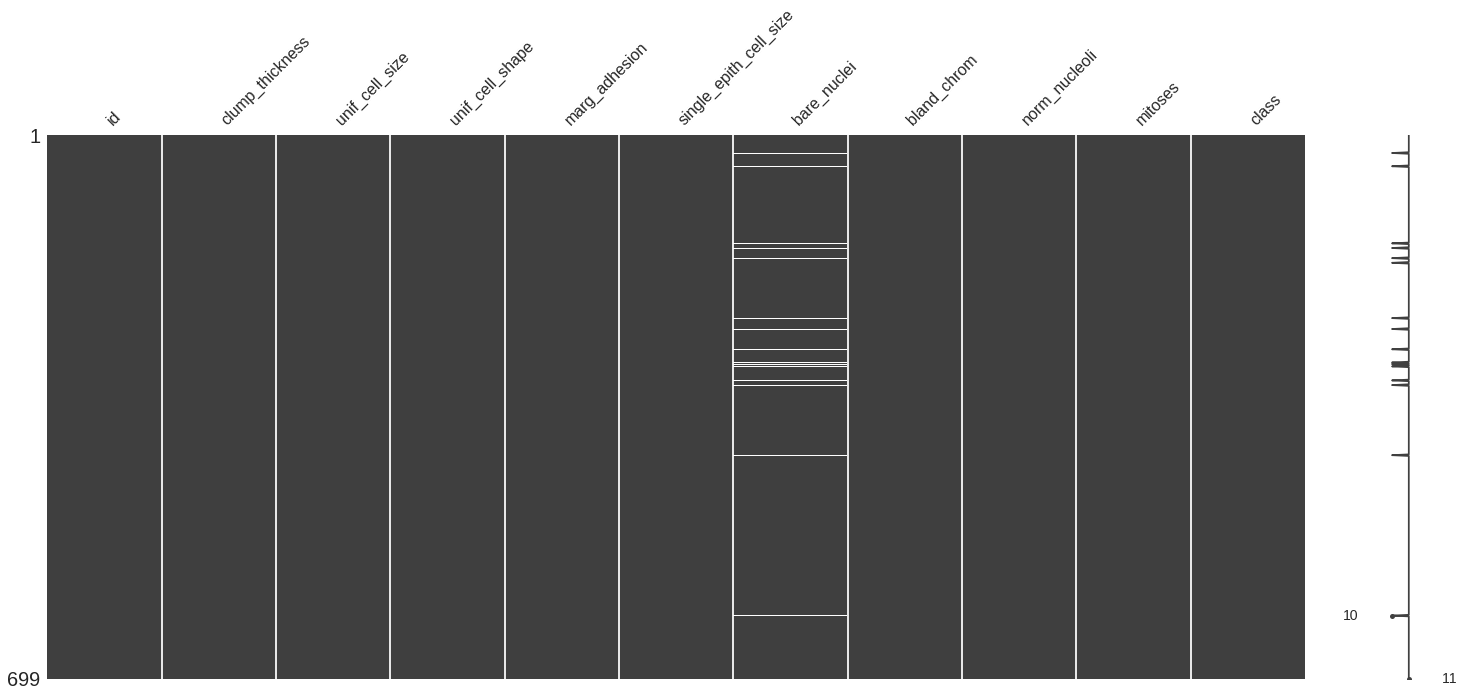

In [82]:
df.replace('?', np.NaN)
msno.matrix(df)

We have to options:


1.   Drop the missing values.  Considering the fact that we have only 699 samples and 16 samples with missing values. It would not be such a big deal if we did drop it.

2.   Impute the missing values. We can impute the values using an imputation method.


3.   Ignore. Because this is KNN model we can simply ignore missing values, infact KNN is one of the most common imputaion methods. 

I will simply get rid of the missing values because there is only 16 of them. 



In [0]:
df.drop(['id'],1,inplace=True)
df.dropna(inplace=True)
x=np.array(df.drop(['class'],1))
y=np.array(df['class'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [84]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
accuracy=clf.score(x_test,y_test)
accuracy

0.9708029197080292